# Case Study: Customer Churn Prediction in Telecom

## Data Cleaning and Preprocessing

### Import/Loading dataset

In [1]:
# Import necessary libraries

# data processing/ data cleaning libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Model Building libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Deployment libraries
import joblib

In [2]:
# Run this code if you using Google Colab
# First upload the dataset in your google drive
from google.colab import drive
drive.mount('/content/drive')
%cd drive
%cd My Drive
%cd 'Customer Churn Dataset '/

Mounted at /content/drive
/content/drive
/content/drive/My Drive
/content/drive/My Drive/Customer Churn Dataset 


In [3]:
# Load dataset
df =pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
# Viewing the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Having an idea of the features involved
df.columns

# 21 features, 1 target feature

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Handling Inconsistency/ Investigative Analysis

<Axes: title={'center': 'Telcom Customer'}>

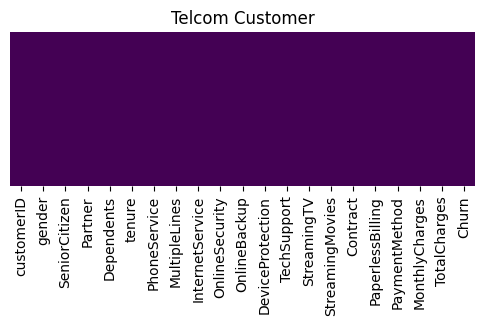

In [6]:
# Investigating if they are missing values
plt.figure(figsize=(6,2))
plt.title('Telcom Customer')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# No missing values found

In [7]:
# Investigating on the data types of each columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# investigating on the columns to check if the data types are accurate.
def check_dtype(columns=df.columns):
    for column in columns:
        unique_values = df[column].unique()
        data_types = df[column].dtypes
        print(f"Unique values in {column}:" + f" dtype in {column}:")
        print(unique_values, data_types)

check_dtype()

Unique values in customerID: dtype in customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] object
Unique values in gender: dtype in gender:
['Female' 'Male'] object
Unique values in SeniorCitizen: dtype in SeniorCitizen:
[0 1] int64
Unique values in Partner: dtype in Partner:
['Yes' 'No'] object
Unique values in Dependents: dtype in Dependents:
['No' 'Yes'] object
Unique values in tenure: dtype in tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] int64
Unique values in PhoneService: dtype in PhoneService:
['No' 'Yes'] object
Unique values in MultipleLines: dtype in MultipleLines:
['No phone service' 'No' 'Yes'] object
Unique values in InternetService: dtype in InternetService:
['DSL' 'Fiber optic' 'No'] object
Unique values in OnlineSecurity: dtype in OnlineSecuri

`Take-offs`

1. **SeniorCitizen:** This should be treated as categorical data with two categories:
   - `0`: Not a senior citizen
   - `1`: A senior citizen

2. **TotalCharges:** This should be considered as numerical data.


In [9]:
# Converting Churn to numerical for Correlation analysis.
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

In [10]:
# Solving this issue: 1.
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [11]:
# Issue 2.
# Checking non numeric data
print(df[~df['TotalCharges'].str.isnumeric()]['TotalCharges'].unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [12]:
# Convert to numeric datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# errors='coerce' argument will convert non-numeric values to NaN.

In [13]:
# Check for NaN values

print(f"Number of NaN values in TotalCharges: {df['TotalCharges'].isna().sum()}")


Number of NaN values in TotalCharges: 11


In [14]:
# I decided to drop the NaN because it is 11 and not a lot compared to the data: 7043
df.dropna(subset=['TotalCharges'], inplace=True)
print(f"Number of NaN values in TotalCharges: {df['TotalCharges'].isna().sum()}")

Number of NaN values in TotalCharges: 0


In [15]:
# Investigating to make sure our processes worked well.
check_dtype(['SeniorCitizen', 'TotalCharges', 'Churn']) # All done.

Unique values in SeniorCitizen: dtype in SeniorCitizen:
['No' 'Yes'] object
Unique values in TotalCharges: dtype in TotalCharges:
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] float64
Unique values in Churn: dtype in Churn:
[0 1] int64


### Feature Engineering

In [16]:
# Feature Engineering by adding features you think might improve the model
df['MonthlyCharges_log'] = np.log1p(df['MonthlyCharges'])


# df['TotalMonetaryValue'] = df['tenure'] * df['MonthlyCharges']


In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_log
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,3.429137
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,4.059581
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,4.004602
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3.768153
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,4.272491


### Feature Selection (Dimensionality Reduction)

In [18]:
# Correlation Analysis

# Select only numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Calculate Pearson correlation coefficients with the target variable
correlation_matrix = numerical_features.corr()
correlation_with_target = correlation_matrix['Churn'].abs().sort_values(ascending=False)

# Set a correlation threshold
correlation_threshold = 0.1

# Select features with correlation above the threshold
selected_n_features = correlation_with_target[correlation_with_target > correlation_threshold].index.tolist()

# Display the selected features
print("Selected numerical Features:")
print(selected_n_features)

Selected numerical Features:
['Churn', 'tenure', 'MonthlyCharges_log', 'TotalCharges', 'MonthlyCharges']


In [19]:
# Univariate Feature Selection
categorical_features = df.select_dtypes(include=['object', 'category'])

# Create a contingency table for each categorical feature vs. the target variable
contingency_tables = {}
for feature in categorical_features.columns:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    contingency_tables[feature] = contingency_table

# Calculate the chi-squared statistic and p-value for each feature
chi2_values = {}
p_values = {}
for feature, table in contingency_tables.items():
    chi2, p, _, _ = stats.chi2_contingency(table)
    chi2_values[feature] = chi2
    p_values[feature] = p

# Set a significance level (you can adjust this)
significance_level = 0.05

# Select features with p-values below the significance level
selected_c_features = [feature for feature, p in p_values.items() if p < significance_level]

# Display the selected features
print("Selected Categorical Features:")
print(selected_c_features)


Selected Categorical Features:
['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### Visual Exploratory Data Analysis (EDA)

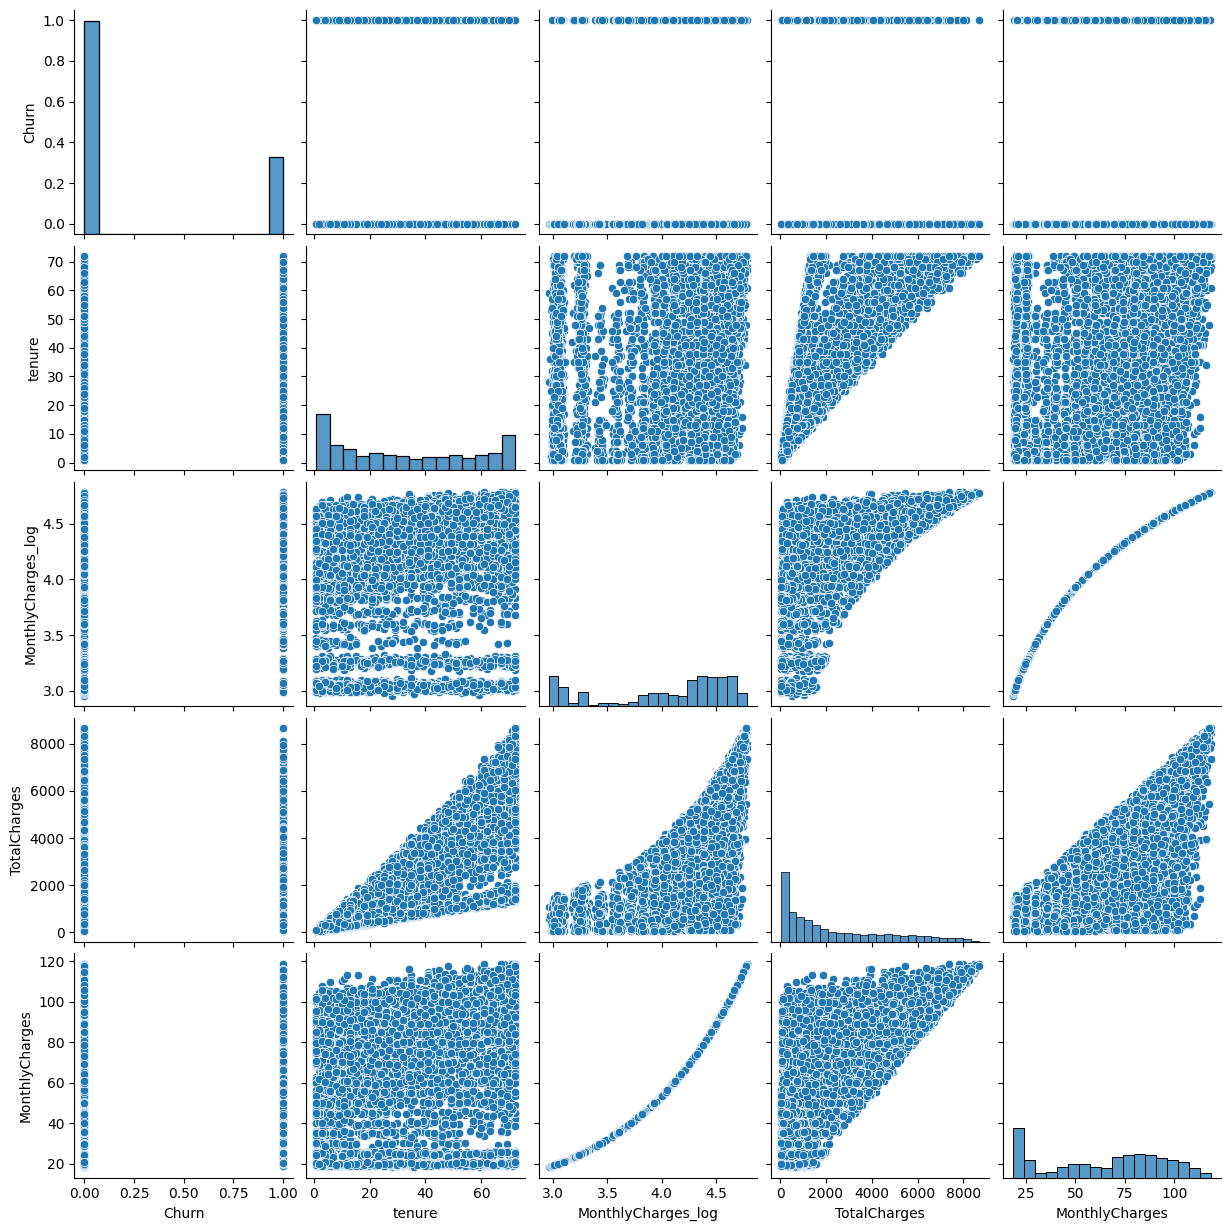

In [20]:
sns.pairplot(data=df[selected_n_features])


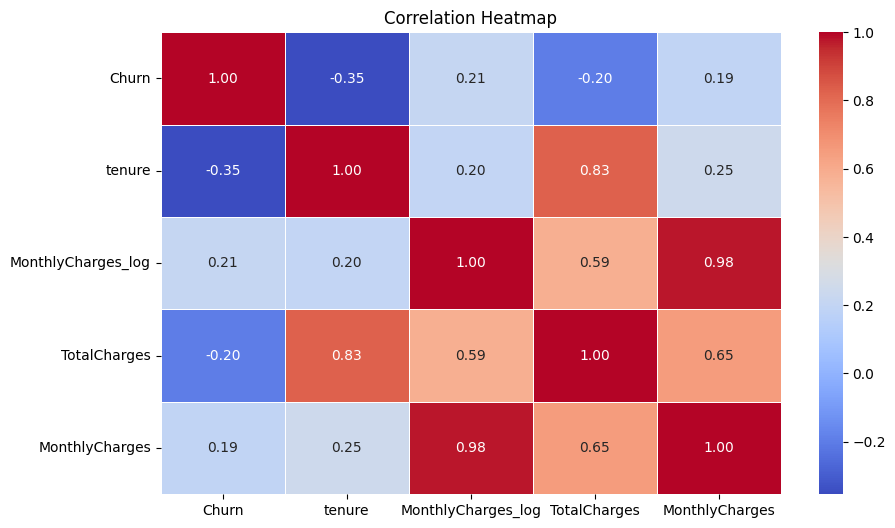

In [21]:
# summary_stats = donor_raw_data[['TARGET_B', 'TARGET_D', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 'RESPONSE_RATE', 'RECENT_RESPONSE_PROP', 'FILE_CARD_GIFT']].describe()
correlations = df[selected_n_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
for column in selected_c_features:
    contingency_table = pd.crosstab(df[column], df['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'{column} Chi-Square p-value: {p}')


SeniorCitizen Chi-Square p-value: 2.4792557203954705e-36
Partner Chi-Square p-value: 3.97379757451591e-36
Dependents Chi-Square p-value: 2.0196592017051303e-42
MultipleLines Chi-Square p-value: 0.0035679273999811405
InternetService Chi-Square p-value: 5.831198962237274e-159
OnlineSecurity Chi-Square p-value: 1.4006867477839222e-184
OnlineBackup Chi-Square p-value: 7.776099238804965e-131
DeviceProtection Chi-Square p-value: 1.9593887862403176e-121
TechSupport Chi-Square p-value: 7.407807748843711e-180
StreamingTV Chi-Square p-value: 1.324641113169159e-81
StreamingMovies Chi-Square p-value: 5.353560421401324e-82
Contract Chi-Square p-value: 7.326182186265472e-257
PaperlessBilling Chi-Square p-value: 8.236203353962564e-58
PaymentMethod Chi-Square p-value: 1.4263098511063342e-139


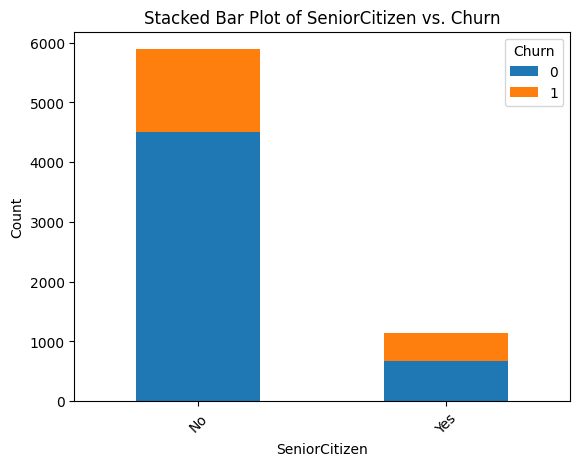

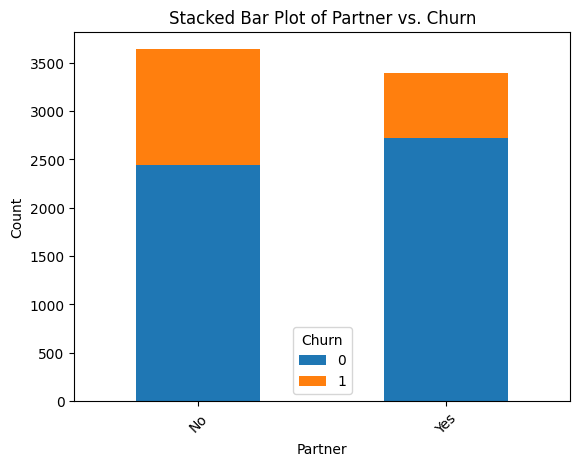

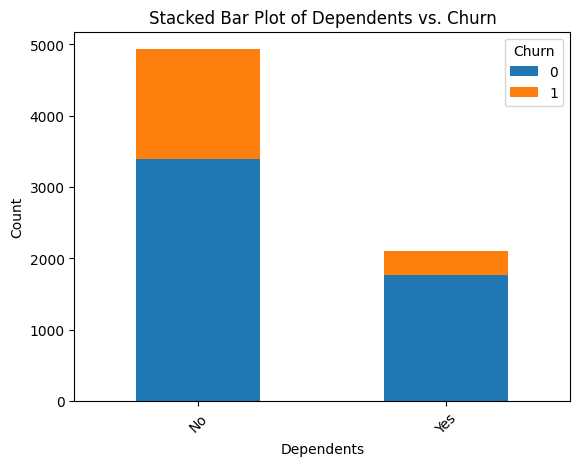

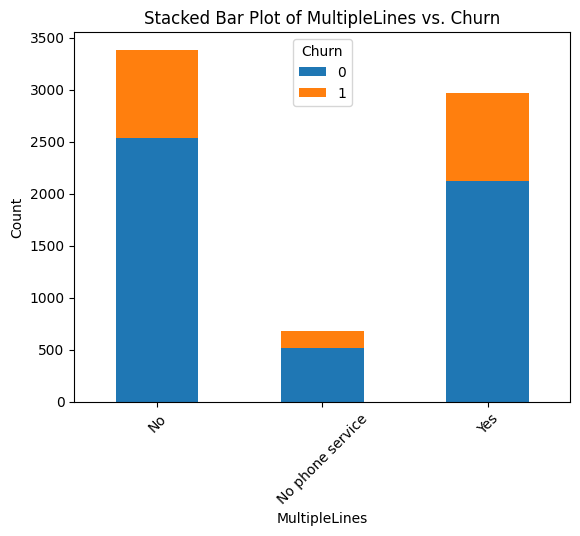

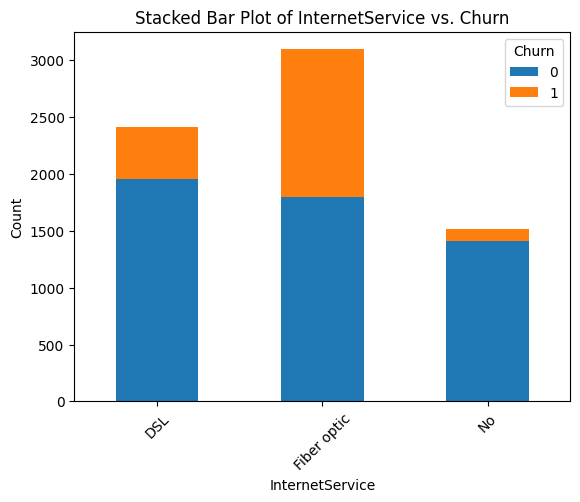

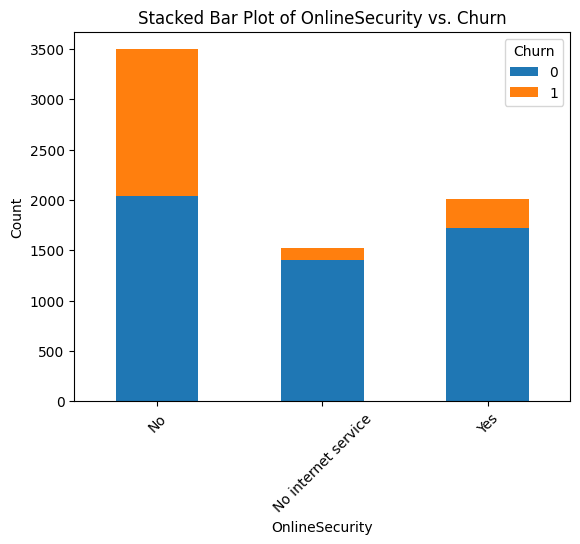

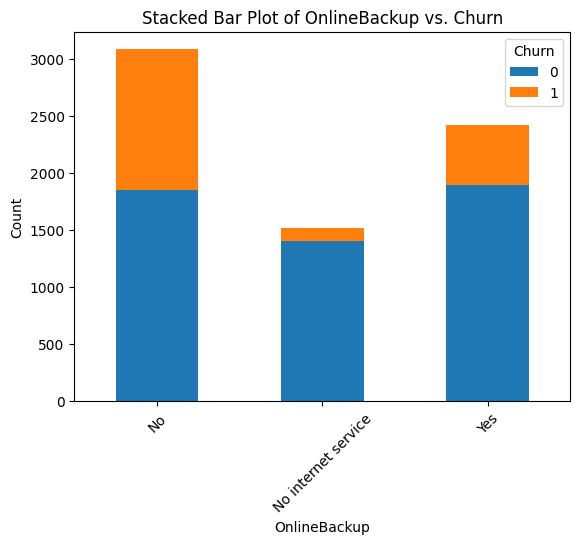

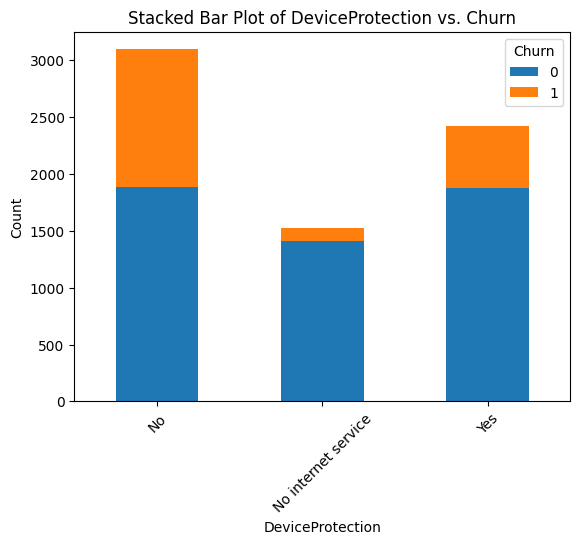

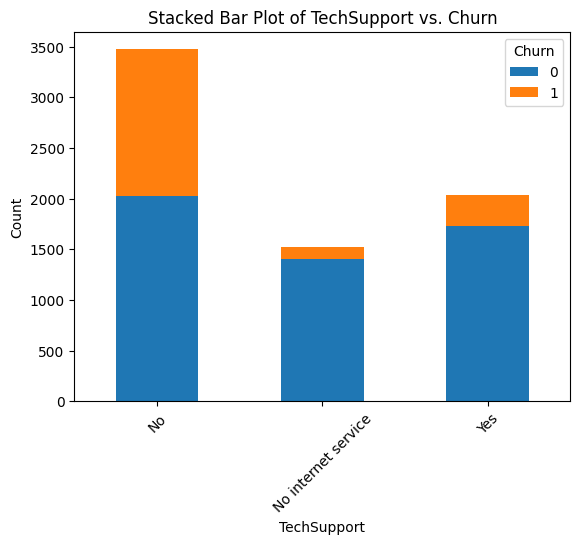

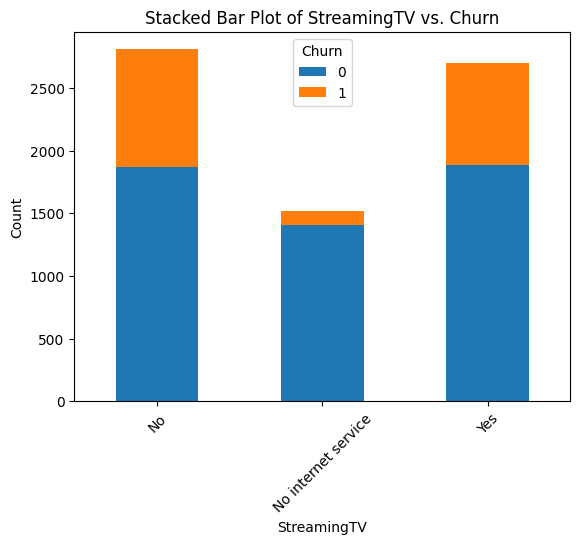

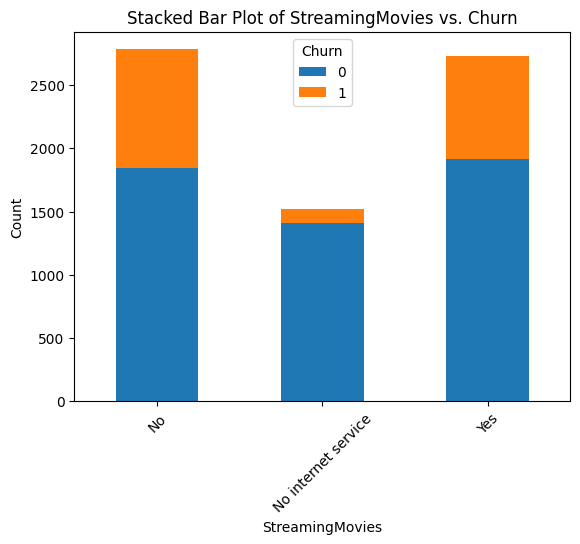

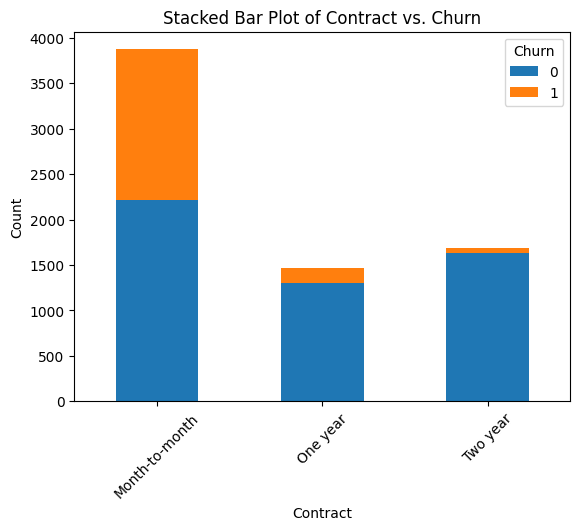

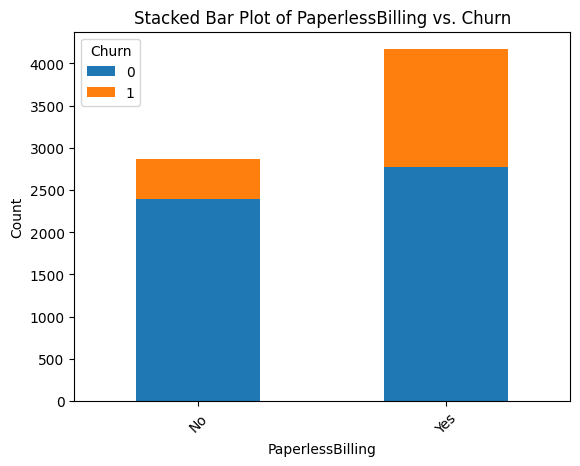

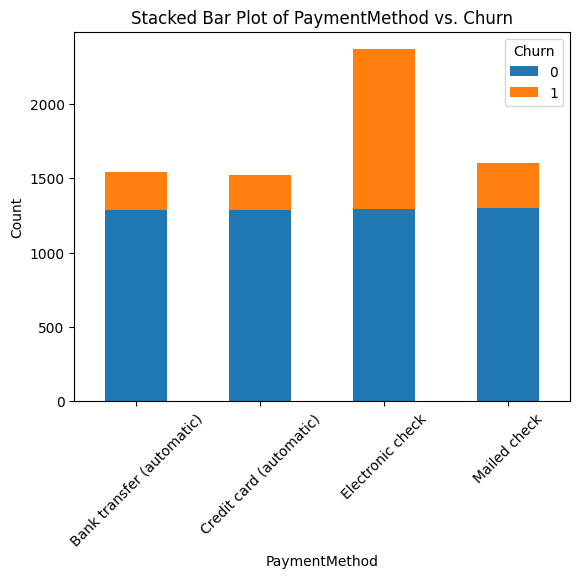

In [23]:
for column in selected_c_features:
    contingency_table = pd.crosstab(df[column], df['Churn'])
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Plot of {column} vs. Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['0', '1'])
    plt.show()


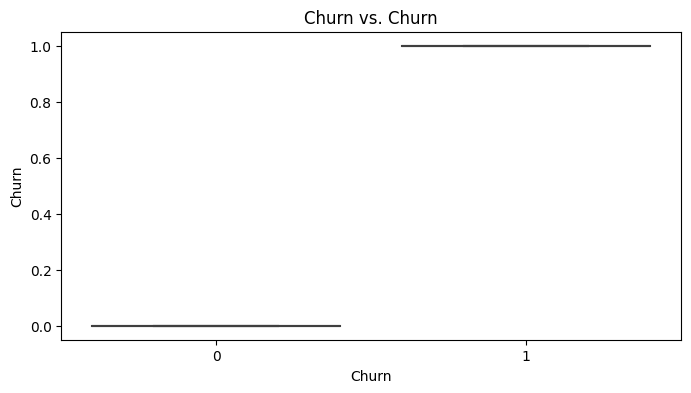

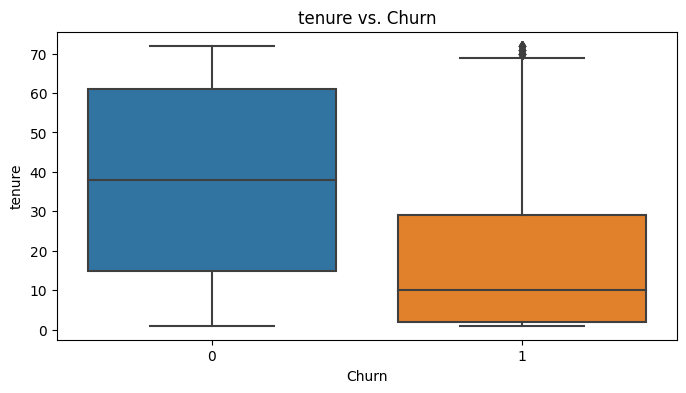

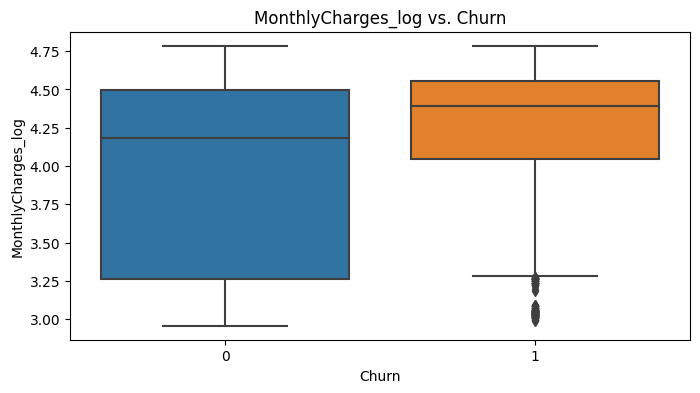

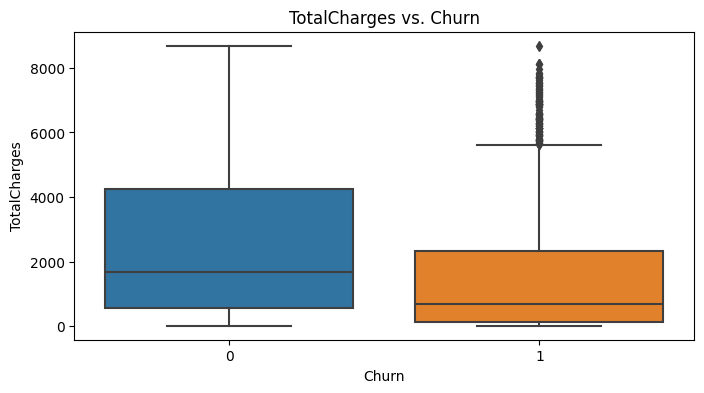

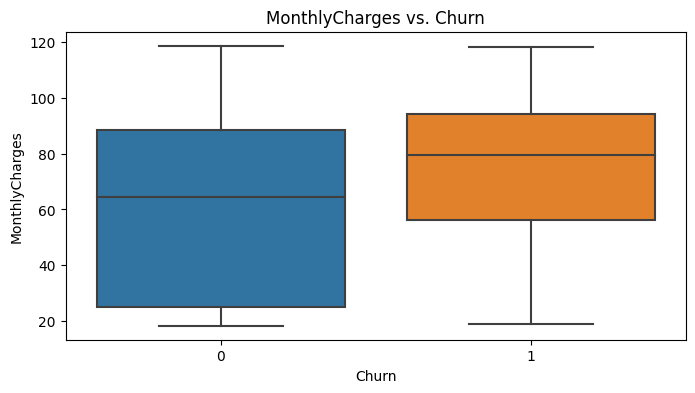

In [24]:
for var in selected_n_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=var, data=df)
    plt.title(f'{var} vs. Churn')
    plt.show()


## Model Building


In [25]:
# List of columns to keep
columns_to_keep = selected_c_features+selected_n_features


# Select and keep only the desired columns
df = df[columns_to_keep]

In [26]:
print(columns_to_keep)

['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure', 'MonthlyCharges_log', 'TotalCharges', 'MonthlyCharges']


### Spliting Data

In [27]:
# Split the data into features (X) and target variable (y)
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:")
print(X_train.shape)  # Print the shape of the training features
print(y_train.shape)  # Print the shape of the training target variable

print("\nTesting data shape:")
print(X_test.shape)   # Print the shape of the testing features
print(y_test.shape)   # Print the shape of the testing target variable


Training data shape:
(5625, 18)
(5625,)

Testing data shape:
(1407, 18)
(1407,)


### Training and Evaluating

In [28]:
# Use Label Encoding for ordinal variables
label_encoder = LabelEncoder()
for feature in selected_c_features:
    X_train[feature] = label_encoder.fit_transform(X_train[feature])
    X_test[feature] = label_encoder.transform(X_test[feature])

# Use One-Hot Encoding for nominal variables
X_train = pd.get_dummies(X_train, columns=selected_c_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=selected_c_features, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges_log', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges_log', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges_log', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges_log', 'TotalCharges']])

# Model training and evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")
    print("\n")

# Initialize variables to keep track of the best model and its accuracy
best_model_name = ""
best_accuracy = 0

# Loop through each model and perform cross-validation
for model_name, model in models.items():
    # Perform cross-validation (you can choose the number of folds as needed)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate the mean accuracy from cross-validation
    mean_accuracy = scores.mean()

    # Check if this model has the highest accuracy so far
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model_name = model_name

# Print the best model and its accuracy
print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy}")



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.7910447761194029
Precision: 0.6298701298701299
Recall: 0.5187165775401069
F1-Score: 0.5689149560117301
ROC AUC: 0.7041791987410118


Model: Random Forest
Accuracy: 0.7860696517412935
Precision: 0.6308243727598566
Recall: 0.47058823529411764
F1-Score: 0.5390505359877489
ROC AUC: 0.6854393257787142


Model: Gradient Boosting
Accuracy: 0.7953091684434968
Precision: 0.6524822695035462
Recall: 0.4919786096256685
F1-Score: 0.5609756097560976
ROC AUC: 0.6985546484720792


Model: SVM
Accuracy: 0.7341862117981521
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: XGBoost
Accuracy: 0.7725657427149965
Precision: 0.5882352941176471
Recall: 0.48128342245989303
F1-Score: 0.5294117647058822
ROC AUC: 0.67965429593469


Learning rate set to 0.02154
0:	learn: 0.6788292	total: 51.5ms	remaining: 51.5s
1:	learn: 0.6639854	total: 56.4ms	remaining: 28.1s
2:	learn: 0.6511241	total: 61.1ms	remaining: 20.3s
3:	learn: 0.6374873	total: 68.7ms	remaining: 17.1s
4:	learn: 0.6264100	total: 75.2ms	remaining: 15s
5:	learn: 0.6137207	total: 81.8ms	remaining: 13.6s
6:	learn: 0.6043672	total: 86ms	remaining: 12.2s
7:	learn: 0.5951735	total: 90ms	remaining: 11.2s
8:	learn: 0.5867641	total: 94.2ms	remaining: 10.4s
9:	learn: 0.5779529	total: 99ms	remaining: 9.8s
10:	learn: 0.5686457	total: 103ms	remaining: 9.27s
11:	learn: 0.5614137	total: 107ms	remaining: 8.8s
12:	learn: 0.5541278	total: 111ms	remaining: 8.4s
13:	learn: 0.5475805	total: 114ms	remaining: 8.06s
14:	learn: 0.5417472	total: 118ms	remaining: 7.75s
15:	learn: 0.5362640	total: 122ms	remaining: 7.5s
16:	lear

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Streaming output truncated to the last 5000 lines.
46:	learn: 0.4482562	total: 208ms	remaining: 4.22s
47:	learn: 0.4468325	total: 212ms	remaining: 4.2s
48:	learn: 0.4449319	total: 216ms	remaining: 4.18s
49:	learn: 0.4433339	total: 220ms	remaining: 4.17s
50:	learn: 0.4420464	total: 224ms	remaining: 4.16s
51:	learn: 0.4408303	total: 228ms	remaining: 4.15s
52:	learn: 0.4395235	total: 232ms	remaining: 4.14s
53:	learn: 0.4382543	total: 236ms	remaining: 4.13s
54:	learn: 0.4366033	total: 240ms	remaining: 4.12s
55:	learn: 0.4352906	total: 244ms	remaining: 4.11s
56:	learn: 0.4343685	total: 248ms	remaining: 4.1s
57:	learn: 0.4333483	total: 253ms	remaining: 4.11s
58:	learn: 0.4323339	total: 257ms	remaining: 4.1s
59:	learn: 0.4314448	total: 261ms	remaining: 4.09s
60:	learn: 0.4304684	total: 265ms	remaining: 4.08s
61:	learn: 0.4293088	total: 269ms	remaining: 4.07s
62:	learn: 0.4283805	total: 273ms	remaining: 4.06s
63:	learn: 0.4274321	total: 277ms	remaining: 4.05s
64:	learn: 0.4263608	total: 281ms	

## Deployment

In [29]:
# Train the best model (Logistic Regression)
best_model = LogisticRegression()
best_model.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'logistic_regression_model.joblib'
joblib.dump(best_model, model_filename)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.joblib']

In [30]:
# Load the logistic regression model from the saved file
loaded_model = joblib.load(model_filename)

# # Perform predictions using the loaded model
predictions = loaded_model.predict(X_test)


In [31]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, predictions)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, predictions)
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(y_test, predictions)
print(f"F1-Score: {f1}")

# Calculate ROC AUC score (if applicable for your task)
roc_auc = roc_auc_score(y_test, predictions)
print(f"ROC AUC: {roc_auc}")


Accuracy: 0.7910447761194029
Precision: 0.6298701298701299
Recall: 0.5187165775401069
F1-Score: 0.5689149560117301
ROC AUC: 0.7041791987410118
